In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from math import isnan
import datetime
from datetime import datetime
%matplotlib inline

In [2]:
def all_values_equal(table, column, check_nan=True, value = None):
    """
    по умолчанию проверяет во всех ли таблицах данная колонка Nan;
    
    
    если check_nan = False, проверяет, в каждой ли таблице одинаковое значение 
    в данной колонке, но необязательно одно для всех таблиц;
    
    
    если  задан value, проверяет во всех ли таблицах в этой колонке именно такое значение;
    
                   
    возвращает название колонки, результат функции и название курса, где первый раз было невыполнено условие


    """
    if check_nan and value is not None:
        raise Exception('Поставьте check_nan=False или уберите значение value')
        
    subjects = ['math','physics','linguo']
    coursers = [['293','294','295'], ['345','346'],['267','268']]
    for s in enumerate(subjects):
        for c in coursers[s[0]]:
            path = f'courses_with_manual_check/{s[1]}/{c}/'
            df =pd.read_csv(path+f'{table}.csv')
            if check_nan:
                if df[column].isna().sum() != df.shape[0]:
                    return column,False, f'{s[1]}-{c}'         
            else:
                try:
                    if len(df[column].value_counts().values) != 1:
                        if value is not None:
                            if df[column].value_counts().values[0]!=value:
                                return column, False, f'{s[1]}-{c}'
                except: 
                    raise Exception(f'Нет такого столбца в {s[1]}-{c}')
        
    return column, True
    


In [3]:
print(all_values_equal('course_element', 'element_type', check_nan=False))
print(all_values_equal('course_element', 'is_advanced', check_nan=False, value=False)) # во всех таблицах False
print(all_values_equal('course_element', 'score', check_nan=False)) #равны между собой внутри каждой таблицы
print(all_values_equal('course_element', 'max_tries'))


print(all_values_equal('user_course_progress', 'advanced_modules_done', check_nan=False, value=0))


print(all_values_equal('user_module_progress', 'progress_failed', check_nan=False, value=0))
print(all_values_equal('user_module_progress', 'time_closed'))
print(all_values_equal('user_module_progress', 'time_done'))


print(all_values_equal('user_element_progress', 'time_started'))
print(all_values_equal('user_element_progress', 'course_element_type', check_nan=False, value='task'))
print(all_values_equal('user_element_progress', 'hints_used', check_nan=False, value=0))



('element_type', True)
('is_advanced', True)
('score', True)
('max_tries', True)
('advanced_modules_done', False, 'math-295')
('progress_failed', True)
('time_closed', False, 'physics-345')
('time_done', False, 'physics-345')
('time_started', True)
('course_element_type', True)
('hints_used', False, 'linguo-267')


Всюду __NaN__:
\
__course_element__: `max_tries`  
__user_element_progress__:`time_started`

Неинформативные поля(возможно):
\
__course_element__: `open_date`(хотя по нему не уверен, может и полезно), `close_date`, `element_type`, `score`(равны между собой внутри каждой таблицы), `is_advanced`\
**user_course_progress** : `time_created`,`time_updated`\
**user_module_progress** : `progress_failed`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`), `tasks_done` дублирует `steps_done`, т.к. в нашем случае все `steps` &mdash; это `tasks`\
__user_element_progress__ :`course_element_type`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`)

In [4]:
path = 'courses_with_manual_check/math/293/'
course_element = pd.read_csv(path+'course_element.csv')
course_element = course_element.drop(columns=['max_tries']).dropna()
course_element = course_element.drop(columns = ['close_date','element_type','score','is_advanced'])
course_element.head().append(course_element.tail())

,id,module_id,element_id,position,open_date
0,4333709,3454,2493,18,2021-03-23 21:00:00
1,4151007,3454,2526,11,2021-03-09 21:00:00
2,4022486,3454,2633,8,2021-03-01 08:00:00
3,5078158,3454,2637,44,2021-05-31 08:00:00
4,4722327,3454,2699,31,2021-04-28 08:00:00
39,4333729,3454,11393,20,2021-03-27 10:00:00
40,4722352,3454,11456,30,2021-04-24 08:00:00
41,4022438,3454,11609,6,2021-02-25 21:00:00
42,4722354,3454,11973,28,2021-04-19 21:00:00
43,4722355,3454,13054,27,2021-04-19 21:00:00


In [5]:
user_course_progress = pd.read_csv(path+'user_course_progress.csv').drop(columns=['time_created','time_updated'])
user_course_progress

,id,user_id,course_id,modules_achieved,advanced_modules_done,modules_closed,modules_done
0,251326,100120070111035903,293,22,0,22,22
1,251178,100119810110737205,293,20,0,19,19
2,251331,100120070111193822,293,21,0,10,10
3,251196,100120070111166725,293,22,0,22,22
4,251218,100120070111579569,293,13,0,13,13
...,...,...,...,...,...,...,...
109,305708,100120080111143974,293,17,0,17,17
110,303078,100120070111045630,293,0,0,0,0
111,303091,100120070110738313,293,2,0,0,2
112,299339,100120070111131771,293,0,0,0,0


`user_module_progress` нас кажется не интересует, как таргет

>Модуль с ручной проверкой отличается от обычного тем, что __все задачи в нём требуют ручной проверки__ преподавателя.
  
  
>`steps_done` —число элементов с __автоматической__ проверкой в модуле, по которым получено максимальное число баллов  

Почему `steps_done` в таблице не ноль? Ладно


In [6]:
user_module_progress = pd.read_csv(path+'user_module_progress.csv').drop(columns=['progress_failed', 'tasks_done'])
user_module_progress['achieve_reason'] = user_module_progress['achieve_reason'].fillna("haven't achieved")
user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)

user_module_progress['is_closed'] = user_module_progress['is_closed'].astype(int)
user_module_progress['is_done'] = user_module_progress['is_done'].astype(int)



user_module_progress

,id,user_id,course_id,course_module_id,progress_current,steps_done,is_achieved,is_closed,course_progress_id,time_created,time_updated,time_closed,time_achieved,time_unlocked,time_done,is_done,achieve_reason
0,4258599,100120070111171973,293,3454,130.0,10,0,0,295079,2021-03-10 18:45:33.221355,2021-06-13 05:25:06.712449,NaN,NaN,2021-03-10 18:45:33.221355,NaN,0,haven't achieved
1,4091857,100120070111412531,293,3454,104.0,13,0,0,251197,2021-02-15 15:16:33.467243,2021-05-12 10:46:54.123536,NaN,NaN,2021-02-15 15:16:33.467243,NaN,0,haven't achieved
2,4288362,100120070110510698,293,3454,0.0,0,0,0,297852,2021-03-15 07:53:33.152413,NaN,NaN,NaN,2021-03-15 07:53:33.152413,NaN,0,haven't achieved
3,4091867,100120100111069319,293,3454,218.0,30,1,0,251184,2021-02-15 15:16:33.467243,2021-05-27 14:20:00.909789,NaN,2021-05-27 14:20:00.909789,2021-02-15 15:16:33.467243,NaN,0,solved
4,4336135,100120070111077654,293,3454,0.0,0,0,0,302793,2021-03-21 11:51:56.202819,NaN,NaN,NaN,2021-03-21 11:51:56.202819,NaN,0,haven't achieved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4257953,100120070111448503,293,3454,0.0,0,0,0,295007,2021-03-10 17:11:52.784012,NaN,NaN,NaN,2021-03-10 17:11:52.784012,NaN,0,haven't achieved
110,4353698,100120080110746673,293,3454,0.0,0,0,0,304476,2021-03-25 09:41:19.007677,NaN,NaN,NaN,2021-03-25 09:41:19.007677,NaN,0,haven't achieved
111,4091834,100120070110754993,293,3454,228.0,31,1,0,251449,2021-02-15 15:16:33.467243,2021-06-12 09:25:59.109609,NaN,2021-06-12 09:25:16.790533,2021-02-15 15:16:33.467243,NaN,0,solved
112,4256581,100120070111532948,293,3454,259.0,35,1,0,294867,2021-03-10 14:18:56.222065,2021-06-05 11:37:37.909807,NaN,2021-05-25 18:35:27.815664,2021-03-10 14:18:56.222065,NaN,0,solved


In [7]:
user_module_progress.isna().sum()/user_module_progress.shape[0]

id                    0.000000
user_id               0.000000
course_id             0.000000
course_module_id      0.000000
progress_current      0.000000
steps_done            0.000000
is_achieved           0.000000
is_closed             0.000000
course_progress_id    0.000000
time_created          0.000000
time_updated          0.543860
time_closed           1.000000
time_achieved         0.885965
time_unlocked         0.000000
time_done             1.000000
is_done               0.000000
achieve_reason        0.000000
dtype: float64

In [8]:
user_element_progress = pd.read_csv(path+'user_element_progress.csv').drop(columns=['course_element_type','time_started'])
user_element_progress['achieve_reason'] = user_element_progress['achieve_reason'].fillna("haven't achieved")
user_element_progress['is_achieved'] = user_element_progress['is_achieved'].fillna(False).astype(int)
user_element_progress

,id,user_id,course_id,course_module_id,course_element_id,progress_current,is_achieved,hints_used,tries_count,module_progress_id,time_created,time_updated,time_closed,time_achieved,achieve_reason
0,96461094,100120070111566368,293,3454,3892,7.0,1,0,1,4091856,2021-05-21 10:16:20.707856,2021-06-11 07:33:25.957219,2021-06-11 07:33:25.959167,2021-06-11 07:33:25.959167,solved
1,96461097,100120080111377852,293,3454,2637,7.0,1,0,1,4091852,2021-05-21 10:16:20.707856,2021-06-11 07:30:33.504585,2021-06-11 07:30:33.506627,2021-06-11 07:30:33.506627,solved
2,96461175,100120090110736982,293,3454,2637,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:30:07.341239,2021-06-11 07:30:07.343554,2021-06-11 07:30:07.343554,solved
3,96461178,100120090110736982,293,3454,3892,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:29:41.535418,2021-06-11 07:29:41.537406,2021-06-11 07:29:41.537406,solved
4,96461112,100120070110754993,293,3454,3892,7.0,1,0,1,4091834,2021-05-21 10:16:21.126957,2021-06-10 07:42:26.286960,2021-06-10 07:42:26.294751,2021-06-10 07:42:26.294751,solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,79509062,100120080111565481,293,3454,4249,7.0,1,0,1,4091843,2021-02-15 15:16:33.467243,2021-02-20 20:35:11.210408,2021-02-20 20:35:11.207655,2021-02-20 20:35:11.207655,solved
5012,79508935,100120070111416092,293,3454,4251,7.0,1,0,1,4091811,2021-02-15 15:16:33.467243,2021-02-19 17:38:56.012436,2021-02-19 17:38:56.013306,2021-02-19 17:38:56.013306,solved
5013,79509064,100120070111166725,293,3454,4150,7.0,1,0,3,4091844,2021-02-15 15:16:33.467243,2021-02-18 18:33:30.509323,2021-02-18 18:33:30.510777,2021-02-18 18:33:30.510777,solved
5014,79508957,100120080110738241,293,3454,5059,7.0,1,0,1,4091817,2021-02-15 15:16:33.467243,2021-02-17 19:11:21.166433,2021-02-17 19:11:21.170167,2021-02-17 19:11:21.170167,solved


In [9]:
user_element_progress[['progress_current','hints_used','tries_count','is_achieved']].describe()

,progress_current,hints_used,tries_count,is_achieved
count,5016.000000,5016.0,5016.000000,5016.000000
mean,1.239234,0.0,0.354864,0.156898
std,2.593916,0.0,0.837118,0.363741
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000
max,7.000000,0.0,7.000000,1.000000


__Файл solution_log.csv__

__Возмножно, неинформативные колонки:__ id, score, review_status (значение not_reviewed соответствует значению not_ready колонки verdict), review_user_id, содержимое ответа ученика и комментарий преподавателя заменяется на размер текста в символах, также колонки со временем удобнее будет заменить на время ответа (возможно, в часах), нужно сохранить время за которое был получен __последний ответ__

In [12]:
solution_log = pd.read_csv(rpath+'solution_log.csv')
solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))
solution_log = solution_log.drop(columns=['users_answer', 'review_user_id', 'review', 'id', 'score', 'review_status'])


NameError: name 'rpath' is not defined

In [13]:

def magic(date):
    date = date[:4]+' '+date[5:7]+' '+date[8:]       
    return date[:18]
difference = []
who = []
indexes = []
for i in range(len(solution_log['review_time'])):
    if solution_log['verdict'][i] != 'not_ready':
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    else:
        indexes.append(i)
        who.append(solution_log['element_progress_id'][i])

NameError: name 'solution_log' is not defined

In [14]:
user_element_progress[['id','user_id', 'course_element_id']]

,id,user_id,course_element_id
0,96461094,100120070111566368,3892
1,96461097,100120080111377852,2637
2,96461175,100120090110736982,2637
3,96461178,100120090110736982,3892
4,96461112,100120070110754993,3892
...,...,...,...
5011,79509062,100120080111565481,4249
5012,79508935,100120070111416092,4251
5013,79509064,100120070111166725,4150
5014,79508957,100120080110738241,5059


In [15]:
solution_log = solution_log.drop(solution_log.index[indexes]) #удаляем строки с непроверенными попытками
solution_log['time_of_expectation'] = difference
solution_log = solution_log.drop(columns=['submission_time'])

NameError: name 'solution_log' is not defined

In [15]:
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation
0,1,0,82569258,ok,2021-03-28 18:04:20.408749,90,34,1 days 00:19:57
1,1,0,84502391,partly,2021-03-27 16:43:33.228312,550,241,0 days 01:05:58
2,2,0,82569006,partly,2021-03-28 18:08:57.773917,182,481,0 days 22:18:02
4,1,0,82569264,partly,2021-03-28 18:10:13.483306,90,34,0 days 21:12:01
5,1,0,82568976,ok,2021-03-28 18:06:28.308071,90,34,0 days 21:23:01
...,...,...,...,...,...,...,...,...
755,1,0,87519291,ok,2021-04-28 12:57:14.715324,90,34,0 days 17:12:59
756,1,0,87519297,ok,2021-04-21 07:29:59.713356,134,34,0 days 12:54:01
757,1,0,87519567,ok,2021-04-23 19:23:16.817287,90,34,0 days 09:53:01
758,1,0,87519345,ok,2021-05-05 17:26:25.952744,90,34,0 days 22:31:57


In [16]:
one_hot = {'partly':0,'wrong':0,'ok':1}
solution_log['verdict']=solution_log['verdict'].map(one_hot).astype(int)
solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation,hours_diff
0,1,0,82569258,1,2021-03-28 18:04:20.408749,90,34,1 days 00:19:57,24
1,1,0,84502391,0,2021-03-27 16:43:33.228312,550,241,0 days 01:05:58,1
2,2,0,82569006,0,2021-03-28 18:08:57.773917,182,481,0 days 22:18:02,22
4,1,0,82569264,0,2021-03-28 18:10:13.483306,90,34,0 days 21:12:01,21
5,1,0,82568976,1,2021-03-28 18:06:28.308071,90,34,0 days 21:23:01,21
...,...,...,...,...,...,...,...,...,...
755,1,0,87519291,1,2021-04-28 12:57:14.715324,90,34,0 days 17:12:59,17
756,1,0,87519297,1,2021-04-21 07:29:59.713356,134,34,0 days 12:54:01,12
757,1,0,87519567,1,2021-04-23 19:23:16.817287,90,34,0 days 09:53:01,9
758,1,0,87519345,1,2021-05-05 17:26:25.952744,90,34,0 days 22:31:57,22


# НЕКОТОРЫЕ ХАРАКТЕРИСТИКИ

Для каждого ученика, проходящего курс, составим вектор из следующих характеристик, в скобках укажем необходимые для вычисления колонки:

1) последний ответ (review_time, hours_diff)

2) максимальное время, медиана, верхний квартиль, 90% квантиль (hours_diff)

3) средний размер ответа преподавателя (можно и другие характеристики посмотреть; size_of_review)

4) средний размер ответа ученика (можно и другие характеристики посмотреть; size_of_answer)

5) количество попыток (tries_count)


In [5]:
def magic(date):
    date = date[:4]+' '+date[5:7]+' '+date[8:]       
    return date[:18]
def prepare_dataframe(folder,course_id,subject=None):
    
    """
    возвращает таблицу с колонками: element_progress_id, hours_diff, user_id, module_is_achieved, 
                                    size_of_answer, size_of_review, rewiew_time, course_element_id
                                    id from solution_log
    """
    if subject is None:
        path = f'{folder}/{course_id}/'
    else:
        path = f'{folder}/{subject}/{course_id}/'
    try:
        solution_log = pd.read_csv(path+'solution_log.csv')
    except:
        raise Exception(f'No such file or directory',path,'solution_log.csv')
    
    
    solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
    solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))

    solution_log = solution_log.dropna(subset=['review_time'])
    solution_log = solution_log.reset_index(drop=True)
    
    ###
    difference = []
    for i in range(len(solution_log['review_time'])):
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    solution_log['time_of_expectation'] = difference
    solution_log = solution_log.drop(columns=['submission_time'])
    ###
    
    solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
    pre_df = solution_log[['element_progress_id','hours_diff', 'size_of_answer', 'size_of_review', 'tries_count', 'review_time']]
    pre_df['id_from_sl'] = solution_log['id']
    pre_df['id']=pre_df['element_progress_id'].astype(int)
    ##pre_df = pre_df.drop(columns=['element_progress_id'])
    try:
        user_element_progress = pd.read_csv(path+'user_element_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_element_progress.csv')
    user_element_progress['id'] = user_element_progress['id'].astype(int)
    user_element_progress.reset_index(drop=True)
    user_element_progress = user_element_progress[['id','user_id', 'course_element_id', 'course_module_id']]
    
    try:
        user_module_progress = pd.read_csv(path+'user_module_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_module_progress.csv')
    user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)
    user_module_progress = user_module_progress[['user_id','is_achieved']]
    
    
    df = pre_df.merge(user_element_progress).merge(user_module_progress, on='user_id').drop(columns='id')
    return df

In [6]:
subjects = ['math','physics','linguo']
coursers = [['293','294','295'], ['345','346'],['267','268']]
df = pd.DataFrame()
for s in enumerate(subjects):
        for c in coursers[s[0]]:
            tmp_df = prepare_dataframe(folder='courses_with_manual_check',subject = s[1],course_id = c)
            for i in tmp_df['user_id']:
                try:
                    if i in df['user_id']:
                        print('Alarm')
                except:
                    pass
            df=df.append(tmp_df, ignore_index=True)
new_coursers_id = [370,67,71,76,84,226,231,233,251,252,259,307,318]
old_coursers_id = [6,7,23,24,25,26,27,28,29,30,31,32,33,36,40,41,42,45,48,49,50,52,53,54,60]
for ID in new_coursers_id:
    tmp_df = prepare_dataframe(folder='new_courses',course_id = str(ID))
    for i in tmp_df['user_id']:
                try:
                    if i in df['user_id']:
                        print('Alarm')
                except:
                    pass
    df=df.append(tmp_df, ignore_index=True)
df = df.sort_values(by = ['user_id', 'review_time'])
for ID in old_coursers_id:
    tmp_df = prepare_dataframe(folder='old_courses',course_id = str(ID))
    for i in tmp_df['user_id']:
                try:
                    if i in df['user_id']:
                        print('Alarm')
                except:
                    pass
    df=df.append(tmp_df, ignore_index=True)
df = df.sort_values(by = ['user_id', 'review_time'])
df

<ipython-input-5-80933bc0e5bd>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['id_from_sl'] = solution_log['id']
<ipython-input-5-80933bc0e5bd>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['id']=pre_df['element_progress_id'].astype(int)


,element_progress_id,hours_diff,size_of_answer,size_of_review,tries_count,review_time,id_from_sl,user_id,course_element_id,course_module_id,is_achieved
0,64815057,124.0,90,34,1,2020-10-28 00:14:03.228184,19424129,100119700110016452,9369,2610,0
1,64815054,157.0,90,34,1,2020-10-29 08:23:38.175426,19424077,100119700110016452,9366,2610,0
2,64815053,168.0,90,362,1,2020-10-29 20:11:57.338260,19424055,100119700110016452,9324,2610,0
3,67336056,40.0,90,34,1,2020-11-07 13:11:25.638969,20003446,100119700110016452,9576,2610,0
4,67919957,24.0,90,286,1,2020-11-10 19:23:48.168905,20147784,100119700110016452,9603,2610,0
...,...,...,...,...,...,...,...,...,...,...,...
30898,18151062,96.0,90,141,3,2020-01-04 10:13:13.808364,3664689,100120180110438066,3752,406,1
30956,18525168,120.0,90,40,1,2020-01-04 10:18:09.417123,3637469,100120180110438066,3824,406,1
30919,18524992,132.0,134,65,1,2020-01-04 23:00:25.800462,3639185,100120180110438066,3825,406,1
30920,18524992,6.0,134,44,2,2020-01-12 19:30:02.358647,4053403,100120180110438066,3825,406,1


In [7]:
def q_9(x):
    return np.quantile(x, 0.9) 
q_9.__name__ = '0.9 quantile'
df1 = df.groupby(['user_id', 'course_module_id']).agg({'hours_diff':['mean',q_9,'median','max','std','min'], 
                         'size_of_answer':['mean','std'], 
                         'size_of_review':['mean','std'],
                         'is_achieved':'max'})
df1.columns = ['_'.join(col) for col in df1.columns]
df1.reset_index(inplace=True)
df1

,user_id,course_module_id,hours_diff_mean,hours_diff_0.9 quantile,hours_diff_median,hours_diff_max,hours_diff_std,hours_diff_min,size_of_answer_mean,size_of_answer_std,size_of_review_mean,size_of_review_std,is_achieved_max
0,100119700110016452,2610,81.285714,161.4,42.0,168.0,65.996753,14.0,90.000000,0.000000,236.714286,265.606673,0
1,100119700110094008,2715,27.966667,66.2,21.0,133.0,29.143369,0.0,1948.566667,1927.468964,562.500000,744.164976,1
2,100119700110709279,792,52.875000,99.5,46.5,106.0,40.387911,0.0,95.500000,15.028861,103.500000,100.890700,0
3,100119700110711227,792,41.833333,98.8,30.5,134.0,40.532122,0.0,1875.055556,1446.803433,64.333333,76.104417,0
4,100119700110714545,596,50.333333,80.2,49.0,147.0,34.798741,2.0,90.000000,0.000000,133.733333,386.265539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,100120180110078041,348,21.411765,33.0,23.0,59.0,15.588693,0.0,2099.000000,1552.627008,978.176471,1033.889394,0
1530,100120180110078041,850,14.750000,33.0,9.5,33.0,10.933130,3.0,2159.125000,1119.957254,144.937500,321.352863,0
1531,100120180110400045,406,8.545455,20.0,7.0,20.0,5.888355,3.0,90.000000,0.000000,77.727273,49.004267,0
1532,100120180110438066,406,28.697368,56.0,27.0,132.0,26.955776,0.0,317.855263,633.224546,125.328947,115.312606,1


In [8]:
import statistics

df2 = df.sort_values(by = ['user_id', 'course_element_id', 'tries_count', 'is_achieved', 'course_module_id'])
person = df2['user_id'][0]
task = df2['course_element_id'][0]
course = df2['course_module_id'][0]
tr = 0
tr_count = 0
last_a = 0
is_winner = 0
w = []
last_answer0 = []
last_answer1 = []
tries = []
for i in range(len(df['user_id'])):
    if person == df['user_id'][i] and course == df['course_module_id'][i]:
        last_a = df['hours_diff'][i]
        is_winner = df['is_achieved'][i]
        if task == df2['course_element_id'][i]:
            tr = df2['tries_count'][i]
        else:
            tr_count = tr + tr_count
            task == df2['course_element_id'][i]
    else:
        tries.append(tr_count)
        w.append(is_winner)
        if is_winner == 0:
            last_answer0.append(last_a)
        else:
            last_answer1.append(last_a)
        person = df['user_id'][i]
        course = df['course_module_id'][i]
        task == df2['course_element_id'][i]
        tr = 0
        tr_count = 0
        last_a = 0
        is_winner = 0

Разобьём все данные на категории в зависимости от значений 'is_achieved'.

In [9]:
alpha = 0.05
def U(x, n, y, m):
    I = 0
    for i in range(n):
        for j in range(m):
            if x[i]<y[j]:
                I = I + 1
    EI = n*m/2
    DI = (n+m+1)*n*m/12
    T = (I-EI)/math.sqrt(DI)
    if T > sts.norm.ppf(1-alpha, loc = 0, scale = 1):
        print("По критерю Уилкоксона отвергаем гипотезу, т.к.:")
        print(str(T)+" > "+str(sts.norm.ppf(1-alpha, loc = 0, scale = 1)))
    else:
        print("По критерию Уилкоксона принимаем гипотезу, т.к.:")
        print(str(T)+" < "+str(sts.norm.ppf(1-alpha, loc = 0, scale = 1)))

p-value при проверке гипотезы однородности 0.01830519366117689
Среднее время ответа


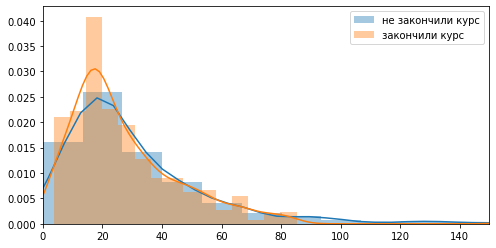

По критерию Уилкоксона принимаем гипотезу, т.к.:
-0.47922513997337035 < 1.6448536269514722


In [10]:
import seaborn as sb
from scipy import stats
df_0 = df1.loc[df1['is_achieved_max'] == 0]
df_1 = df1.loc[df1['is_achieved_max'] == 1]
t1 = df_0['hours_diff_mean']
t2 = df_1['hours_diff_mean']
import math
import scipy.stats as sts
print('p-value при проверке гипотезы однородности', stats.ks_2samp(t1, t2)[1])

t1 = np.sort(t1)
t2 = np.sort(t2)
plt.figure(figsize=(8, 4))
sb.distplot(t1, label = 'не закончили курс')
sb.distplot(t2, label = 'закончили курс')
print('Среднее время ответа')
plt.xlim(0, 150)
plt.legend()
plt.show()
#U(t1, 387, t2, 220)
U(t1, 776, t2, 357)

90% квантиль


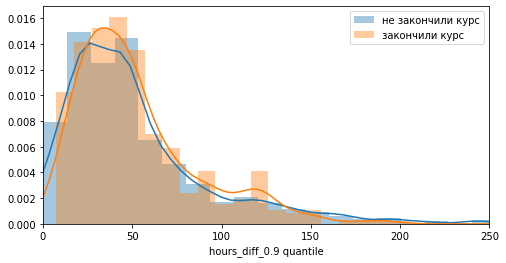

p-value при проверке гипотезы однородности 0.017719715866836627
По критерию Уилкоксона принимаем гипотезу, т.к.:
1.3200190030098464 < 1.6448536269514722


In [11]:
plt.figure(figsize=(8, 4))
sb.distplot(df_0['hours_diff_0.9 quantile'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff_0.9 quantile'], label = 'закончили курс')
print('90% квантиль')
plt.xlim(0, 250)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff_0.9 quantile'], df_1['hours_diff_0.9 quantile'])[1])

t1 = df_0['hours_diff_0.9 quantile'].tolist()
t2 = df_1['hours_diff_0.9 quantile'].tolist()

U(t1, 776, t2, 357)

Медиана


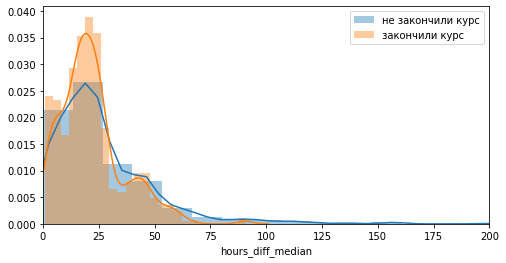

p-value при проверке гипотезы однородности 0.0012906077161332075
По критерию Уилкоксона принимаем гипотезу, т.к.:
-3.017828460982386 < 1.6448536269514722


In [12]:
plt.figure(figsize=(8, 4))
sb.distplot(df_0['hours_diff_median'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff_median'], label = 'закончили курс')
print('Медиана')
plt.xlim(0, 200)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff_median'], df_1['hours_diff_median'])[1])


t1 = df_0['hours_diff_median'].tolist()
t2 = df_1['hours_diff_median'].tolist()
U(t1, 776, t2, 357)

Максимум


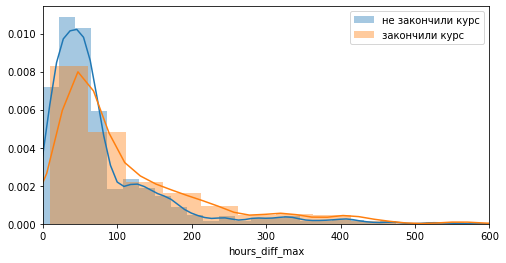

p-value при проверке гипотезы однородности 2.0679846723936635e-10
По критерю Уилкоксона отвергаем гипотезу, т.к.:
6.785569997852955 > 1.6448536269514722


In [13]:
plt.figure(figsize=(8, 4))
sb.distplot(df_0['hours_diff_max'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff_max'], label = 'закончили курс')
print('Максимум')
plt.legend()
plt.xlim(0, 600)
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff_max'], df_1['hours_diff_max'])[1])


t1 = df_0['hours_diff_max'].tolist()
t2 = df_1['hours_diff_max'].tolist()
U(t1, 776, t2, 357)

Средняя длина ответа ученика


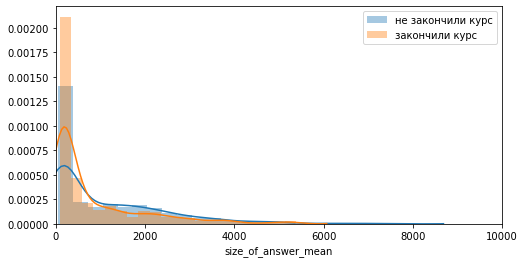

p-value при проверке гипотезы однородности 1.230942470398233e-06
По критерию Уилкоксона принимаем гипотезу, т.к.:
-1.2058805520537093 < 1.6448536269514722


In [14]:
plt.figure(figsize=(8, 4))
sb.distplot(df_0['size_of_answer_mean'], label = 'не закончили курс')
sb.distplot(df_1['size_of_answer_mean'], label = 'закончили курс')
print('Средняя длина ответа ученика')
plt.xlim(0, 10000)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['size_of_answer_mean'], df_1['size_of_answer_mean'])[1])

t1 = df_0['size_of_answer_mean'].tolist()
t2 = df_1['size_of_answer_mean'].tolist()
U(t1, 776, t2, 357)

Средняя длина ответа преподавателя


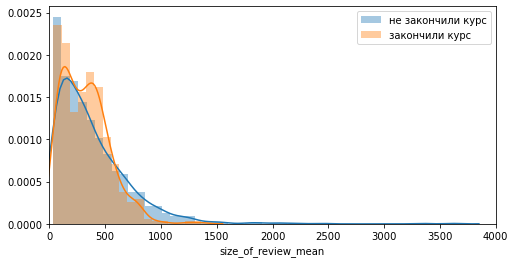

p-value при проверке гипотезы однородности 0.0007629919626124249
По критерию Уилкоксона принимаем гипотезу, т.к.:
-1.5834755644633958 < 1.6448536269514722


In [15]:
plt.figure(figsize=(8, 4))
sb.distplot(df_0['size_of_review_mean'], label = 'не закончили курс')
sb.distplot(df_1['size_of_review_mean'], label = 'закончили курс')
print('Средняя длина ответа преподавателя')
plt.xlim(0, 4000)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['size_of_review_mean'], df_1['size_of_review_mean'])[1])


t1 = df_0['size_of_review_mean'].tolist()
t2 = df_1['size_of_review_mean'].tolist()
U(t1, 776, t2, 357)

Время ожидания последнего ответа от преподавателя


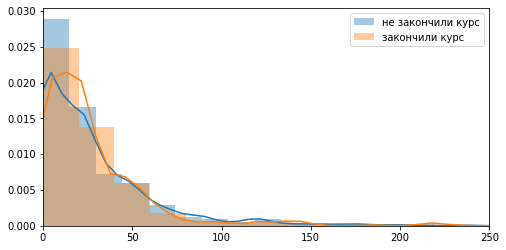

p-value при проверке гипотезы однородности 0.00037821534009241375
По критерию Уилкоксона принимаем гипотезу, т.к.:
-0.06703679568142987 < 1.6448536269514722


In [16]:

plt.figure(figsize=(8, 4))
sb.distplot(last_answer0, label = 'не закончили курс')
sb.distplot(last_answer1, label = 'закончили курс')
print('Время ожидания последнего ответа от преподавателя')
plt.xlim(0, 250)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(last_answer0, last_answer1)[1])


t1 = last_answer0
t2 = last_answer1
U(t1, 776, t2, 357)

In [17]:
df = df.sort_values(by = ['user_id', 'course_module_id','course_element_id', 'tries_count'])
df.head(20)

,element_progress_id,hours_diff,size_of_answer,size_of_review,tries_count,review_time,id_from_sl,user_id,course_element_id,course_module_id,is_achieved
2,64815053,168.0,90,362,1,2020-10-29 20:11:57.338260,19424055,100119700110016452,9324,2610,0
1,64815054,157.0,90,34,1,2020-10-29 08:23:38.175426,19424077,100119700110016452,9366,2610,0
0,64815057,124.0,90,34,1,2020-10-28 00:14:03.228184,19424129,100119700110016452,9369,2610,0
3,67336056,40.0,90,34,1,2020-11-07 13:11:25.638969,20003446,100119700110016452,9576,2610,0
5,67919958,42.0,90,760,1,2020-11-11 13:37:45.488134,20147771,100119700110016452,9602,2610,0
4,67919957,24.0,90,286,1,2020-11-10 19:23:48.168905,20147784,100119700110016452,9603,2610,0
6,68886422,14.0,90,147,1,2020-11-14 10:52:26.477000,20260737,100119700110016452,9685,2610,0
8,67584158,21.0,90,757,1,2020-10-30 10:01:49.865490,19662018,100119700110094008,9550,2715,1
7,67584159,3.0,339,2366,2,2020-10-29 15:55:07.107728,19662051,100119700110094008,9596,2715,1
9,67584159,1.0,90,34,3,2020-10-30 11:16:06.411196,19695111,100119700110094008,9596,2715,1


Количество попыток


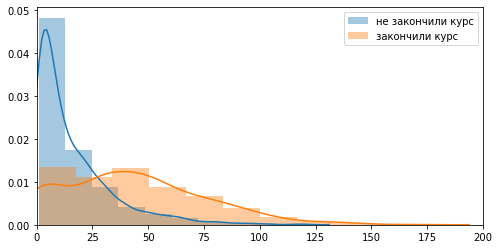

p-value при проверке гипотезы однородности 2.55351295663786e-15
По критерию Уилкоксона принимаем гипотезу, т.к.:
0.21955172472760673 < 1.6448536269514722


In [20]:
tr_0 = []
tr_1 = []
t = 0
person = df['user_id'][0]
course = df['course_module_id'][0]
for i in range(len(df['user_id'])):
    if person == df['user_id'][i] and course == df['course_module_id'][i]:
        t = t + 1
    else:
        person = df['user_id'][i]
        course = df['course_module_id'][i]
        if df['is_achieved'][i-1] == 0:
            tr_0.append(t)
        else:
            tr_1.append(t)
        t = 1
plt.figure(figsize=(8, 4))
sb.distplot(tr_0, bins = 10, label = 'не закончили курс')
sb.distplot(tr_1, bins = 10, label = 'закончили курс')
print('Количество попыток')
plt.xlim(0, 200)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(tr_0, tr_1)[1])
U(t1, 387, t2, 220)

Нормированное количество попыток


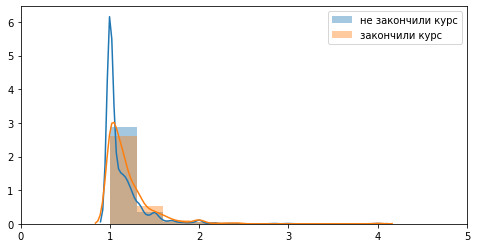

По критерию Уилкоксона принимаем гипотезу, т.к.:
-0.06703679568142987 < 1.6448536269514722


In [22]:
tr_0 = []
tr_1 = []
not_0 = []
not_1 = []
count_tr = 0
T = []
t = 0
count = 1
person = df['user_id'][0]
course = df['course_module_id'][0]
task = df['course_element_id'][0]
for i in range(len(df['user_id'])):
    if person == df['user_id'][i] and course == df['course_module_id'][i]:
        t = t + 1
        if df['course_element_id'][i] != task:
            count = count + 1
            count_tr = count_tr + df['tries_count'][i-1]
            task = df['course_element_id'][i]
    else:
        person = df['user_id'][i]
        course = df['course_module_id'][i]
        task = df['course_element_id'][i]
        if df['is_achieved'][i-1] == 0:
            tr_0.append(t/count)
            not_0.append(t-count_tr)
        else:
            tr_1.append(t/count)
            not_1.append(t-count_tr)
        t = 1
        count = 1
        count_tr = 0
plt.figure(figsize=(8, 4))
sb.distplot(tr_0, bins = 10, label = 'не закончили курс')
sb.distplot(tr_1, bins = 10, label = 'закончили курс')
print('Нормированное количество попыток')
plt.xlim(0, 5)
plt.legend()
plt.show()
U(t1, 776, t2, 357)

Количество непроверенных попыток


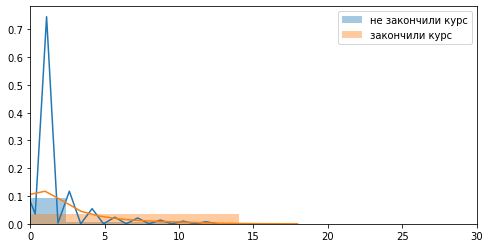

По критерию Уилкоксона принимаем гипотезу, т.к.:
-0.06703679568142987 < 1.6448536269514722


In [23]:
plt.figure(figsize=(8, 4))
sb.distplot(not_0, bins = 10, label = 'не закончили курс')
sb.distplot(not_1, bins = 10, label = 'закончили курс')
print('Количество непроверенных попыток')
plt.xlim(0, 30)
plt.legend()
plt.show()
U(t1, 776, t2, 357)

In [24]:
df_0_ = df.loc[df['is_achieved'] == 0]
df_1_ = df.loc[df['is_achieved'] == 1]
df_0_ = df_0_.groupby(['user_id', 'course_element_id'])['tries_count'].agg({'sum', 'max'})
df_1_ = df_1_.groupby(['user_id', 'course_element_id'])['tries_count'].agg({'sum', 'max'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Максимальное количество попыток по задаче


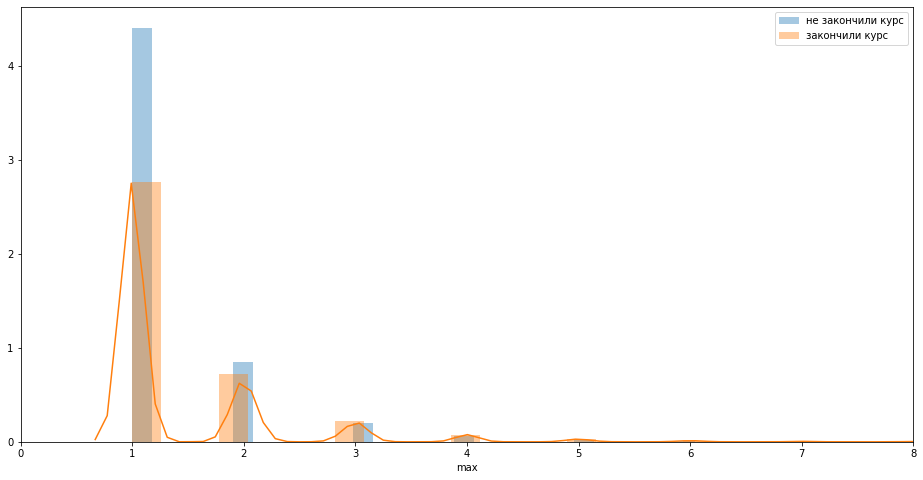

p-value при проверке гипотезы однородности 6.947339907809617e-39
По критерию Уилкоксона принимаем гипотезу, т.к.:
-17.641231162078437 < 1.6448536269514722


In [25]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0_['max'], label = 'не закончили курс')
sb.distplot(df_1_['max'], label = 'закончили курс')
print('Максимальное количество попыток по задаче')
plt.xlim(0, 8)
plt.legend()
plt.show()

t1 = df_0_['max'].tolist()
t2 = df_1_['max'].tolist()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(t1,t2)[1])
U(t1, 776, t2, 357)